In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [5]:
art = pd.read_csv('../data/Art_in_Public_Places.csv')

In [10]:
art

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.162400,-86.774910,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.159610,-86.775940,"(36.15961, -86.77594)"
3,Blowing Bubbles,Faxon,Russell,"4715 Harding Pike, Nashville TN",Bronze,Sculpture,NaN,36.119750,-86.853430,"(36.11975, -86.85343)"
4,Anticipation,Faxon,Russell,"505 Deaderick Street, Nashville TN",Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.164890,-86.781840,"(36.16489, -86.78184)"
...,...,...,...,...,...,...,...,...,...,...
159,Bell Garden Mural,Cooper,Michael,"655 Colice Jeanne Road, Nashville TN",paint,Mural,Artist Michael Cooper worked with Bellevue Mid...,36.070567,-86.935194,"(36.070567, -86.935194)"
160,Tomatoes,Goller-Brown and Lawrence,Sterling and Ian,"701 Porter Road at Eastland Avenue, Nashville TN",paint on brick,Mural,Tomatoes,36.182437,-86.733449,"(36.182437, -86.733449)"
161,Timeless,Sorci,Joe,3rd Avenue North between Commerce and Broadway...,Steel and Civil War cannonballs,Sculpture,Two nearly interlinked hemicycles with cannonb...,36.162270,-86.776310,"(36.16227, -86.77631)"
162,Sam Davis of Tennessee,Zolnay,George Julian,"600 Charlotte Avenue, Nashville TN",Bronze on a limestone base,Sculpture,"George Julian Zolnay (1863-1949), originally f...",36.165100,-86.784270,"(36.1651, -86.78427)"


In [12]:
type(art)

pandas.core.frame.DataFrame

In [18]:
art['Type'].unique()

array(['Mural', 'Sculpture', 'Frieze', 'Mobile', 'Stained Glass',
       'Mosaic', 'Relief', 'Various', 'Bronzes', 'Furniture',
       'Sculpture/Fountain', 'Murals'], dtype=object)

In [19]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [20]:
art_geo = gpd.GeoDataFrame(art,crs=zipcodes.crs,geometry=gpd.points_from_xy(art.Longitude, art.Latitude))

In [21]:
type(art_geo)

geopandas.geodataframe.GeoDataFrame

In [22]:
art_geo.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240)
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.83660 36.12856)
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961)
3,Blowing Bubbles,Faxon,Russell,"4715 Harding Pike, Nashville TN",Bronze,Sculpture,NaN,36.11975,-86.85343,"(36.11975, -86.85343)",POINT (-86.85343 36.11975)
4,Anticipation,Faxon,Russell,"505 Deaderick Street, Nashville TN",Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,"(36.16489, -86.78184)",POINT (-86.78184 36.16489)


In [23]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [24]:
zipcodes=zipcodes[['zip','po_name','geometry']]
zipcodes.head()

,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,NASHVILLE,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,BRENTWOOD,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,FRANKLIN,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [25]:
art_by_zip = gpd.sjoin(art_geo, zipcodes, predicate = 'within')

In [26]:
art_by_zip.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.16017,-86.77575,"(36.16017, -86.77575)",POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.15993,-86.77611,"(36.15993, -86.77611)",POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.15920,-86.77571,"(36.1592, -86.77571)",POINT (-86.77571 36.15920),36,37201,NASHVILLE


In [32]:
art_by_zip['zip'].value_counts()

zip
37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37221     6
37214     6
37204     4
37209     4
37115     3
37207     2
37216     2
37211     2
37240     2
37215     2
37213     2
37076     1
Name: count, dtype: int64

In [33]:
art_in_37219 = art_by_zip.loc[art_by_zip['zip'] == '37219']
art_in_37219.shape

(33, 14)

In [34]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

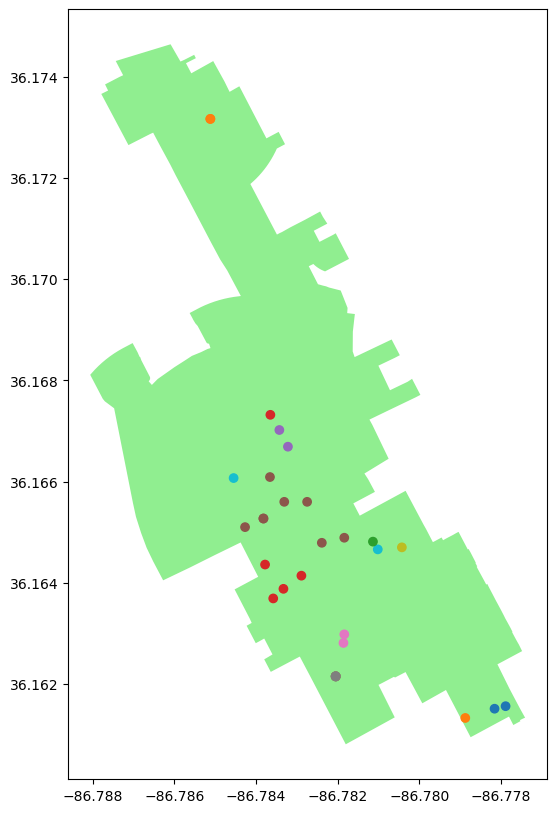

In [35]:
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
art_in_37219.plot( ax = ax, column = 'Location');
plt.show();

In [36]:
polygon37219.geometry.centroid

/var/folders/73/8ylhfl6151q5ccx79mch6ddc0000gn/T/ipykernel_58353/226734311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37219.geometry.centroid


24    POINT (-86.78317 36.16682)
dtype: geometry

In [38]:
center = polygon37219.geometry.centroid[24]
print(center)

POINT (-86.783173370701 36.16681838008157)


/var/folders/73/8ylhfl6151q5ccx79mch6ddc0000gn/T/ipykernel_58353/1179354559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid[24]


In [39]:
area_center = [center.y, center.x]
print(area_center)

[36.16681838008157, -86.783173370701]


In [40]:
map_37219 = folium.Map(location =  area_center, zoom_start = 12)
map_37219

In [41]:
#draw our zip code area: 37207
map_37219 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Location'])
    icon=folium.Icon(color="pink",icon="palette", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37219)
map_37219.save('../maps/map37219.html')

#display our map
map_37219